In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [223]:
# Load the cleaned dataset
df = pd.read_csv('final_cleaned.csv')

# Pivot the data to have pollutants as separate columns
df = df.pivot_table(values='value', index=['location', 'city', 'country', 'timestamp', 'latitude', 'longitude'], columns='pollutant').reset_index()

# Include pollutants and location, and drop rows with missing values
df = df[['latitude', 'longitude', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'co']].dropna()

In [224]:
df.drop(columns=['latitude', 'longitude'], inplace=True)

In [225]:
df.reset_index(drop=True, inplace=True)

In [226]:
df

pollutant,pm25,pm10,no2,so2,o3,co
0,11.00490,15.05950,20.29320,4.04394,45.8600,281.522
1,6.10774,7.84260,8.82229,2.00682,60.7611,256.811
2,6.68390,11.27310,3.00396,2.01421,77.3206,224.263
3,7.05426,8.37591,3.59084,2.72724,70.9611,236.714
4,6.89768,8.47832,4.42044,1.89229,69.3244,245.185
...,...,...,...,...,...,...
59334,7.62408,26.87570,31.00660,14.20000,30.4433,201.660
59335,7.76555,13.82210,9.43725,15.56760,54.1572,104.500
59336,10.57300,20.41160,9.41176,14.18960,46.3289,7.460
59337,13.52200,26.79870,23.86080,15.86660,87.1739,178.000


In [227]:
# Calculate percentiles for PM2.5 and PM10 within the dataset
pm25_33 = df['pm25'].quantile(0.33)
pm25_66 = df['pm25'].quantile(0.66)

pm10_33 = df['pm10'].quantile(0.33)
pm10_66 = df['pm10'].quantile(0.66)

# Define a categorization function based on these percentiles
def categorize_air_quality(row):
    if row['pm25'] <= pm25_33 and row['pm10'] <= pm10_33:
        return 'Low'
    elif (pm25_33 < row['pm25'] <= pm25_66) or (pm10_33 < row['pm10'] <= pm10_66):
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new target column
df['air_quality_category'] = df.apply(categorize_air_quality, axis=1)

# Check the distribution of the new target variable
print(df['air_quality_category'].value_counts())

air_quality_category
Medium    29318
High      16079
Low       13942
Name: count, dtype: int64


In [228]:
df.head()

pollutant,pm25,pm10,no2,so2,o3,co,air_quality_category
0,11.00490,15.05950,20.29320,4.04394,45.8600,281.522,Medium
1,6.10774,7.84260,8.82229,2.00682,60.7611,256.811,Low
2,6.68390,11.27310,3.00396,2.01421,77.3206,224.263,Medium
3,7.05426,8.37591,3.59084,2.72724,70.9611,236.714,Medium
4,6.89768,8.47832,4.42044,1.89229,69.3244,245.185,Medium


In [229]:
# Select features and label
X = df[['pm25', 'pm10', 'no2', 'so2', 'o3', 'co']]
y = df['air_quality_category']

In [230]:
X

pollutant,pm25,pm10,no2,so2,o3,co
0,11.00490,15.05950,20.29320,4.04394,45.8600,281.522
1,6.10774,7.84260,8.82229,2.00682,60.7611,256.811
2,6.68390,11.27310,3.00396,2.01421,77.3206,224.263
3,7.05426,8.37591,3.59084,2.72724,70.9611,236.714
4,6.89768,8.47832,4.42044,1.89229,69.3244,245.185
...,...,...,...,...,...,...
59334,7.62408,26.87570,31.00660,14.20000,30.4433,201.660
59335,7.76555,13.82210,9.43725,15.56760,54.1572,104.500
59336,10.57300,20.41160,9.41176,14.18960,46.3289,7.460
59337,13.52200,26.79870,23.86080,15.86660,87.1739,178.000


In [231]:
y

0        Medium
1           Low
2        Medium
3        Medium
4        Medium
          ...  
59334    Medium
59335    Medium
59336    Medium
59337    Medium
59338    Medium
Name: air_quality_category, Length: 59339, dtype: object

## Data Preparation

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
encoder = LabelEncoder()
df['air_quality_category_encoded'] = encoder.fit_transform(df['air_quality_category'])

# Define features and target
X = df.drop(columns=['air_quality_category', 'air_quality_category_encoded'])  # Features
y = df['air_quality_category_encoded']  # Encoded target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (47471, 6)
Testing features shape: (11868, 6)
Training target shape: (47471,)
Testing target shape: (11868,)


In [244]:
X_train.head()

pollutant,pm25,pm10,no2,so2,o3,co
14875,15.000,17.000,2.000000,3.000000,17.000000,100.00
20321,5.000,31.200,2.900000,3.200000,75.800000,140.00
58882,8.523,41.355,0.004008,0.014395,0.044314,0.23
18558,24.440,61.160,21.690000,1.320000,8.650000,610.00
8850,6.100,11.000,0.005000,0.001000,0.035000,0.14


In [246]:
y_train.head()

14875    2
20321    0
58882    2
18558    0
8850     1
Name: air_quality_category_encoded, dtype: int32

In [248]:
X_test.head()

pollutant,pm25,pm10,no2,so2,o3,co
16355,31.844,30.585,0.017317,0.012479,0.009611,0.669
17663,8.000,26.000,0.003000,0.000000,0.054000,0.150
33245,10.000,47.000,0.014000,0.000000,0.029000,0.080
15669,2.000,4.000,5.000000,2.000000,66.000000,100.000
34966,2.200,6.000,0.001000,0.000000,0.026000,0.120


In [250]:
y_test.head()

16355    2
17663    2
33245    2
15669    1
34966    1
Name: air_quality_category_encoded, dtype: int32

## Building Naive Bayes Models

Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      3204
           1       0.88      0.91      0.89      2823
           2       0.87      0.85      0.86      5841

    accuracy                           0.86     11868
   macro avg       0.86      0.87      0.86     11868
weighted avg       0.86      0.86      0.86     11868

Gaussian Naive Bayes Accuracy: 0.8613077182339063


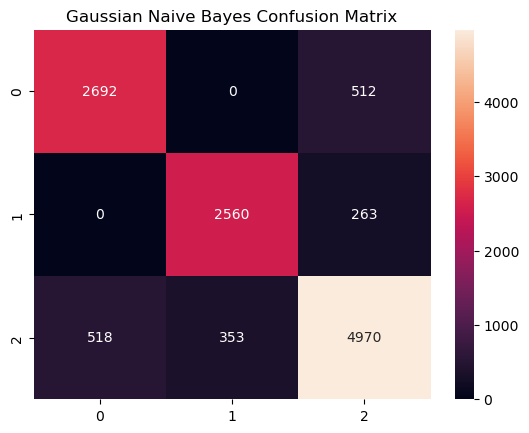

Multinomial Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.78      0.50      3204
           1       0.37      0.39      0.38      2823
           2       0.58      0.20      0.29      5841

    accuracy                           0.40     11868
   macro avg       0.44      0.46      0.39     11868
weighted avg       0.47      0.40      0.37     11868

Multinomial Naive Bayes Accuracy: 0.4019211324570273


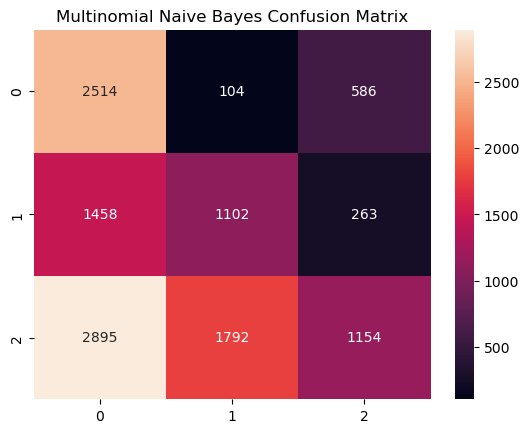

Bernoulli Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3204
           1       0.53      0.16      0.25      2823
           2       0.51      0.97      0.67      5841

    accuracy                           0.51     11868
   macro avg       0.35      0.38      0.31     11868
weighted avg       0.38      0.51      0.39     11868

Bernoulli Naive Bayes Accuracy: 0.5140714526457701


C:\Users\thall\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thall\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thall\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


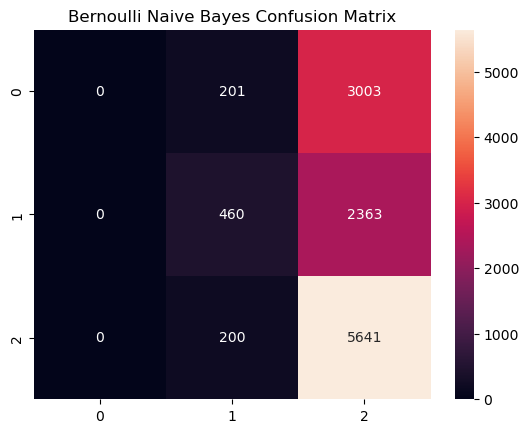

In [253]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train and evaluate Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("Gaussian Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_gnb))
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d')
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()

# Train and evaluate Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("Multinomial Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_mnb))
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_mnb))
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d')
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.show()

# Train and evaluate Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("Bernoulli Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_bnb))
print("Bernoulli Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_bnb))
sns.heatmap(confusion_matrix(y_test, y_pred_bnb), annot=True, fmt='d')
plt.title("Bernoulli Naive Bayes Confusion Matrix")
plt.show()

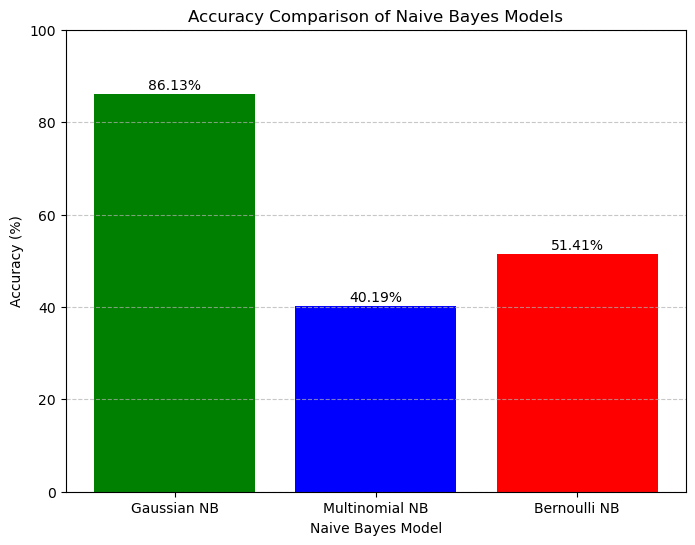

In [255]:
import matplotlib.pyplot as plt

# Accuracy data from the results
models = ['Gaussian NB', 'Multinomial NB', 'Bernoulli NB']
accuracies = [86.13, 40.19, 51.41]  # Accuracy percentages for each model

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['green', 'blue', 'red'])
plt.title('Accuracy Comparison of Naive Bayes Models')
plt.xlabel('Naive Bayes Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy labels on the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=10)

# Show the plot
plt.show()

## Decision Tree

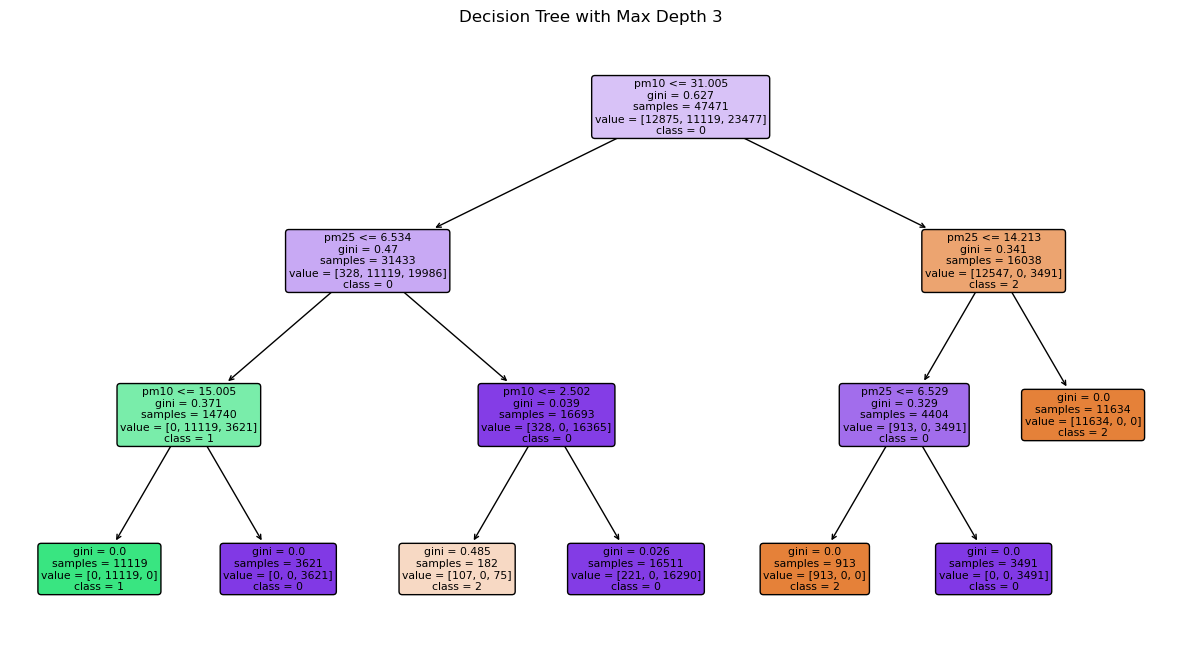


Decision Tree (Max Depth = 3) Results:
Accuracy: 99.3933265925177
Confusion Matrix:
 [[3150    0   54]
 [   0 2823    0]
 [  18    0 5823]]


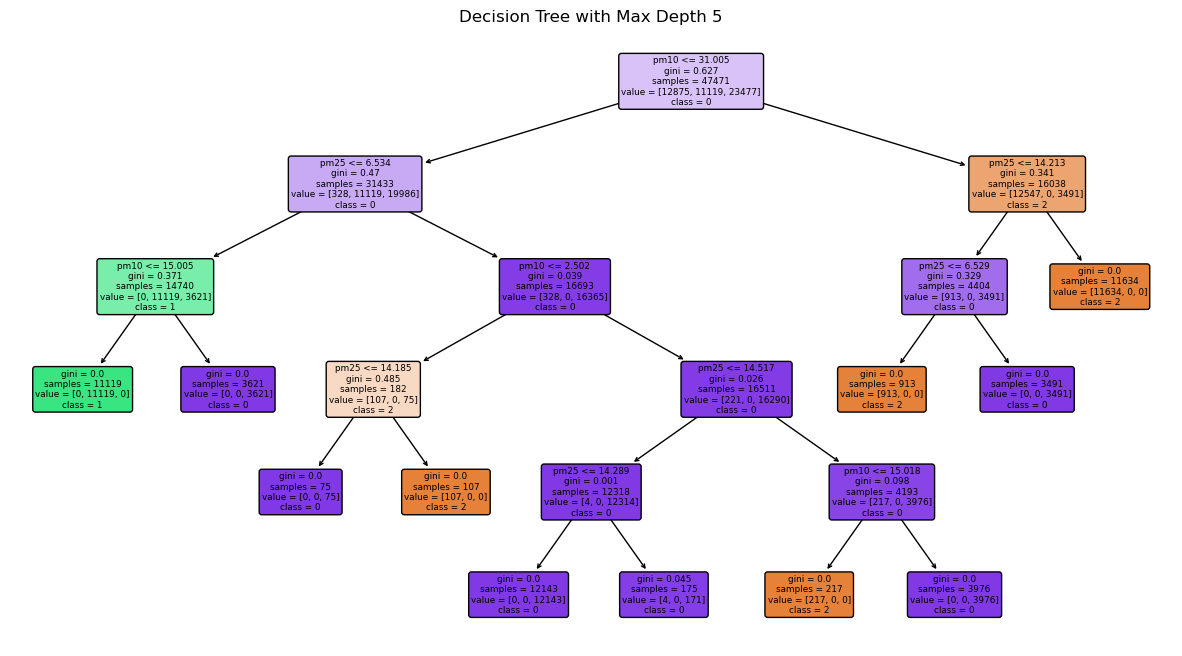


Decision Tree (Max Depth = 5) Results:
Accuracy: 99.98314796090327
Confusion Matrix:
 [[3202    0    2]
 [   0 2823    0]
 [   0    0 5841]]


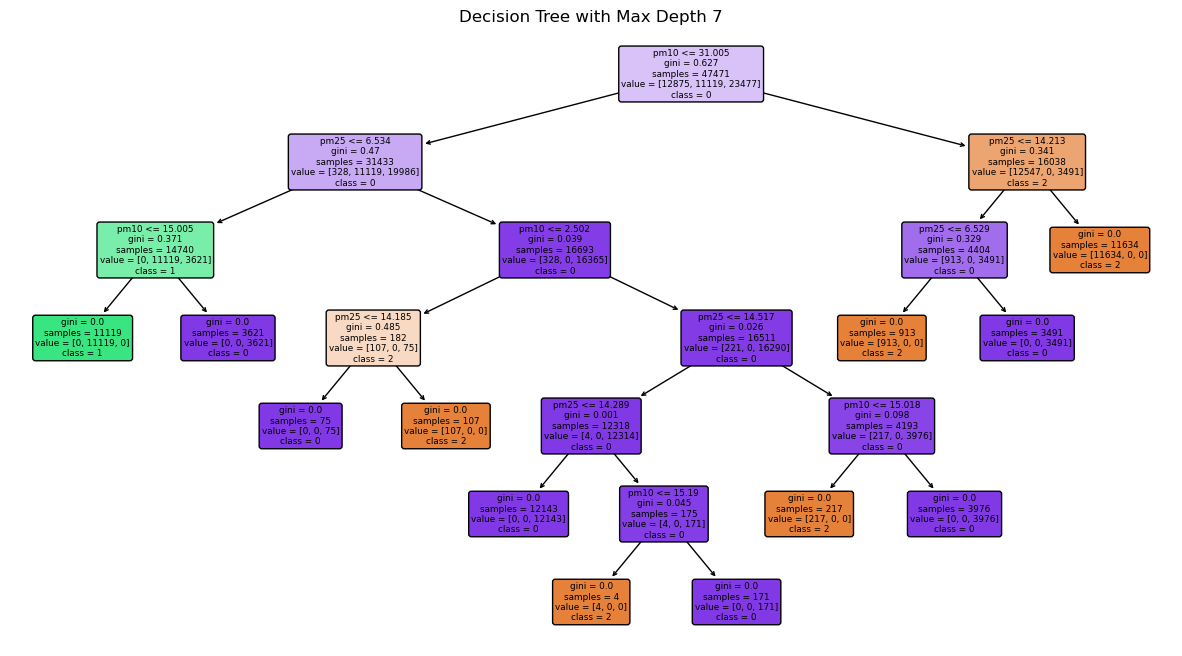


Decision Tree (Max Depth = 7) Results:
Accuracy: 99.99157398045163
Confusion Matrix:
 [[3204    0    0]
 [   0 2823    0]
 [   1    0 5840]]


In [259]:
# Convert y unique values to strings for plotting
class_names = [str(label) for label in y.unique()]

# List of different depths to train Decision Trees with varying complexity
depths = [3, 5, 7]

for depth in depths:
    # Train the Decision Tree with a specified maximum depth
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    # Visualize the Decision Tree
    plt.figure(figsize=(15, 8))
    plot_tree(dt, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
    plt.title(f"Decision Tree with Max Depth {depth}")
    plt.show()

    # Print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nDecision Tree (Max Depth = {depth}) Results:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)